# AYL_Vibro_22 - Replicating the results from previous Experiment 22 run

Previously, the organization of the experiments were not only confusing, but the model source code keeps getting overridden thus prohibits easy future reproducibility.
To reproduce the result, one would have to roll back the single source code by matching the version control history with the corresponding experiment number.

However, I have failed to document the experiment of which a version control commit belongs to, additionally, notes regarding a specific experiment are all documented in a chornological order in my lab notebook thus making the gathering of notes to understand what an experiment accomplishes much harder. 

Instead, this notebook is aiming for a notebook and folder approach and thus allowing for reducibility and understandability.


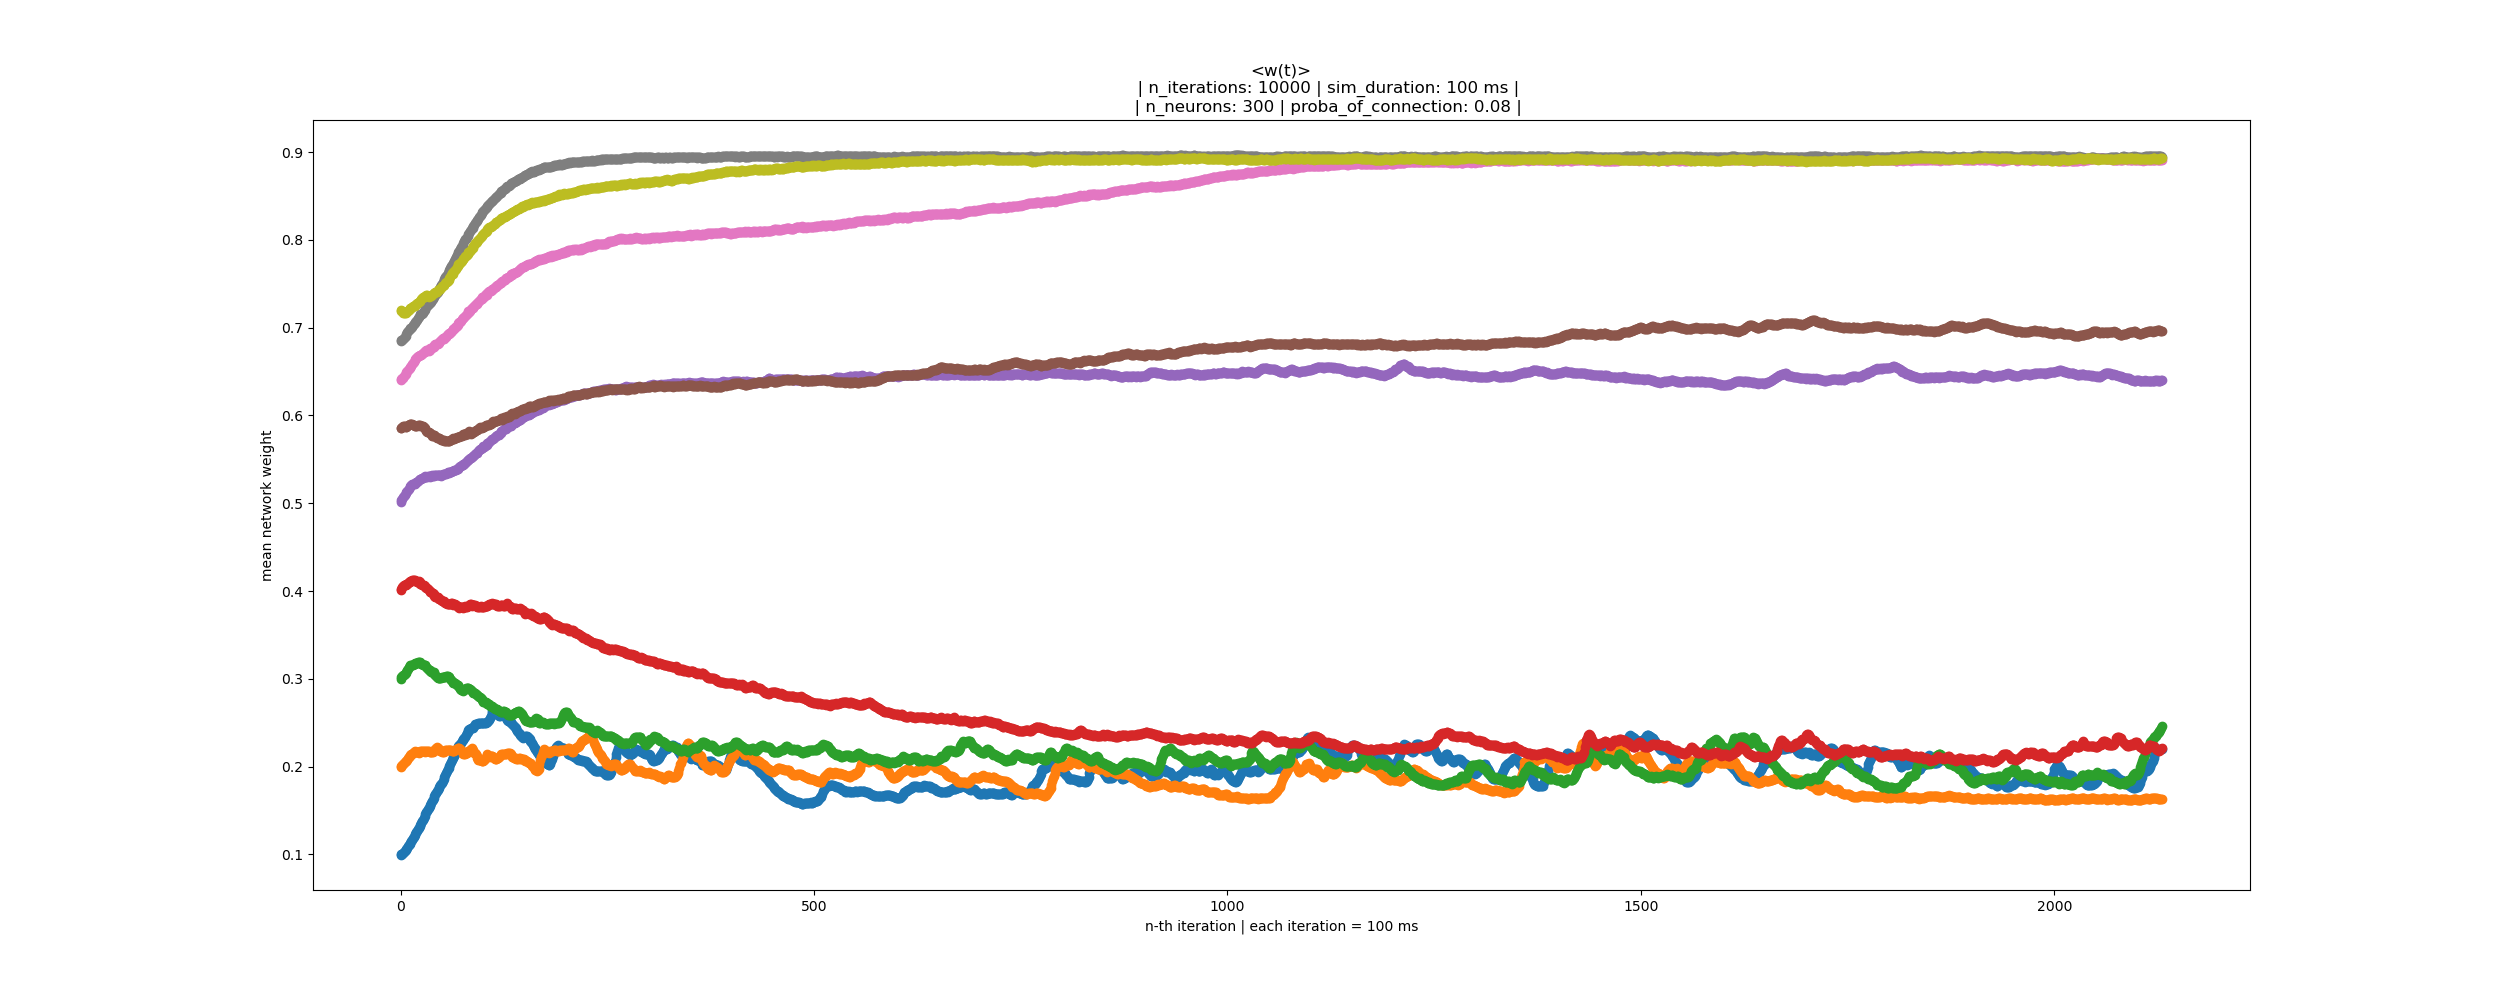

## Interpreting the Plot
Below is the partial figure created for this plot. The simulation was interrupted because it exceeded the specified run duration, however, still have some interesting figures to view and understand.

- It is showing somewhat of a multi-stable state where we can see mean weights under 0.45 trends towards the bottom around 0.2, mean weights between 0.45-0.6 trends towards 0.6, and lastly, mean weights above 0.6 trends towards 0.9.

__Few Things to Note:__
- The mean weight calculation function was errorneous hence starting from mean weight of 0.6, the initial point of the colored lines does not match with 0.6, 0.7, 0.8, and 0.9.
    - ??? What was the issue with the mean weight calculation function?
- The source code has changed since then. Thus, the code under `src` may not produce the same result as above.



In [ ]:
## Experimenting the weight and conn proba

    # Initialize network connectivity matrix
    self.network_conn = np.random.choice(a=[True, False], 
                                         p=[proba_conn, (1-proba_conn)], 
                                         size=(self.n_neurons, self.n_neurons))
    # Generate weight matrix
    self.network_weight = np.random.random(size=(self.n_neurons, self.n_neurons))
    
    # Normalized to mean conductivity (i.e., `mean_w`)
    connected_subset = self.network_weight[self.network_conn]  # Filter out non-connected
    current_nn_mean = np.mean(connected_subset)
    normalization_scale = mean_w / current_nn_mean
    self.network_weight = np.multiply(normalization_scale, self.network_weight)
    
    # Mark non-connected pairs' weight as zero
    self.network_weight = np.multiply(self.network_conn, self.network_weight)

In [14]:
import numpy as np

proba_conn = 0.07
n_neurons=1000
mean_w = 1


network_conn = np.random.choice(a=[True, False], 
                                p=[proba_conn, 1-proba_conn]
                                , size=(n_neurons, n_neurons))

network_weight = np.random.random(size=(n_neurons, n_neurons))

## Normalize connection weight (amongs those with connections)
connected_subset = network_weight[network_conn]
print(f"Connection space size: {n_neurons*n_neurons}; connected_subset.size: {connected_subset.size}; ratio: {connected_subset.size/(n_neurons*n_neurons)}")
current_nn_mean = np.mean(connected_subset)
normalization_scale = mean_w / current_nn_mean
network_weight =  np.multiply(normalization_scale, network_weight)

## Mark non-connected pairs to have weight zero
network_weight = np.multiply(network_conn, network_weight)

print(f"Subset mean: {np.mean(connected_subset)}")
print(f"Total mean: {network_weight.mean()}")



Connection space size: 1000000; connected_subset.size: 69951; ratio: 0.069951
Subset mean: 0.49892865400394065
Total mean: 0.069951


In [37]:
import numpy as np
import matplotlib.pyplot as plt

n_neurons = 1000
num = 10

proba_conn = np.linspace(start=0.01, stop=1, num=num)

mean_w = np.linspace(start=0.1, stop=1.0, num=num, endpoint=True)

def calc_and_return_two_means(n_neurons, proba_conn, mean_w):

    network_conn = np.random.choice(a=[True, False], 
                                    p=[proba_conn, 1-proba_conn],
                                    size=(n_neurons, n_neurons),
                                    )
    
    network_weight = np.random.random(size=(n_neurons, n_neurons))

    network_weight = np.multiply(network_weight, network_conn)

    ## Kromer mean (total connection space)
    kromer_normalization_scale = mean_w / np.mean(network_weight)
    print(f"kromer_normalization_scale: {kromer_normalization_scale}")
    network_weight_kromer = np.multiply(network_weight, kromer_normalization_scale)
    network_weight_kromer = np.clip(network_weight_kromer, 0, 1)
    kromer_mean = np.mean(network_weight_kromer)
    kromer_mean_subset = np.sum(network_weight_kromer) / np.count_nonzero(network_weight_kromer)


    ## Lee mean (only the subset of connected)
    connected_subset = network_weight[network_conn]
    lee_normalization_scale = mean_w / np.mean(connected_subset)
    print(f"lee_normalization_scale: {lee_normalization_scale}")
    network_weight_lee = np.multiply(network_weight, lee_normalization_scale)
    network_weight_lee = np.clip(network_weight_lee, 0, 1)
    lee_mean = np.sum(network_weight_lee) / np.count_nonzero(network_weight_lee)
    lee_mean_superset = np.mean(network_weight_lee)


    return (kromer_mean, kromer_mean_subset, lee_mean, lee_mean_superset)



for i in mean_w: 
    result = calc_and_return_two_means(n_neurons, 0.07, i)
    lee_mean = result[2]
    kromer_mean = result[0]
    print(f"Target mean weight: {i}")
    print(f"lee_mean: {round(lee_mean, 3)}, kromer_mean: {round(kromer_mean, 3)}")
    print("#"*80)



kromer_normalization_scale: 2.84163578299322
lee_normalization_scale: 0.19965048847732067
Target mean weight: 0.1
lee_mean: 0.1, kromer_mean: 0.058
################################################################################
kromer_normalization_scale: 5.726720339827218
lee_normalization_scale: 0.3994215635419291
Target mean weight: 0.2
lee_mean: 0.2, kromer_mean: 0.064
################################################################################
kromer_normalization_scale: 8.572992016777933
lee_normalization_scale: 0.5987892004038716
Target mean weight: 0.30000000000000004
lee_mean: 0.3, kromer_mean: 0.066
################################################################################
kromer_normalization_scale: 11.446170441199829
lee_normalization_scale: 0.8007740840663395
Target mean weight: 0.4
lee_mean: 0.4, kromer_mean: 0.067
################################################################################
kromer_normalization_scale: 14.293496704963133
lee_normalization_sc

In [42]:

## What are itertools? 
import itertools
# [x for x in itertools.product(np.arange(5), np.arange(4))]


## Asterisk operations for two numpy 2D arrays
array1 = np.random.randint(1, 5, (5, 4))
array2 = np.random.randint(1, 5, (5, 4))
array3 = array1 * array2  # Element-wise
# array3 = np.dot(array1, array2)  # This does not work, it automatically recognizes the matrices and attempts matmul




## Testing asterisk operator of two numpy 2D arrays

ValueError: shapes (5,4) and (5,4) not aligned: 4 (dim 1) != 5 (dim 0)

## Experiment Script

The script below imports the model code packages and runs the simulation.

In [ ]:
## Experiment Running Script

## Importling the model code
import sys
sys.path.append( '../src')
from model import lifNetwork as lif
from plotting import plotStructure as lifplot

## Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime


################################################################################
### CHANGE VARIABLES WITH THIS DICTIONARY
# - kappa_noise is not used when update_g_noise method uses "Ali"'s method
#   because he doesn't use this variable.
################################################################################


choose_model_setup = {"update_g_noise_method": "Ali",
                      "update_g_syn_method": "Ali",
                      "update_v_method": "Ali",
                      "update_v_capacitance_method": "Ali",
                      "update_thr_method": "Tony"
                      }


################################################################################
### PLOTTING FUNCTIONS, DON'T TOUCH!!!
################################################################################
def plot_network_mean_weight_over_time(n_neurons=300,
                                       n_sim = 10000,
                                       sim_duration=100,
                                       kappa=400,  # Paper states 8, Ali's code states 400
                                       kappa_noise=0.026,  # Ali's code does have this, he just used g_poisson=1.3
                                       proba_conn = 0.08,
                                       mean_w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                                       export_iteration_skip = 10,
                                       plot_width = 25,
                                       plot_height=10,
                                       choose_model_setup=choose_model_setup,
                                       ):
  """Plot the mean network weight over time.

  Args:
      n_neurons (int, optional): _description_. Defaults to 300.
      proba_conn (float, optional): _description_. Defaults to 0.8.
      sim_duration (float, optional): _description_. Defaults to 100.
      n_sim (int, optional): _description_. Defaults to 10000.
      plot_width (float, optional): _description_. Defaults to 20.
      plot_height (float, optional): _description_. Defaults to 10.
      export_iteration_skip (int, optional): _description_. Defaults to 10.
  """
  # Set variables
  now = datetime.now()
  now_str = now.strftime("%Y-%m-%d-%H-%M-%S")
  export_directory = "export_"+now_str
  x_iter = []
  holder_mean_network_w = {}
  holder_LIF  = {}
  # Instantiate LIF network

  for idx, val in enumerate(mean_w):
    name = f"LIF{idx}"
    holder_LIF[name] = lif.LIF_Network(n_neurons=n_neurons)
    holder_LIF[name].random_conn(proba_conn=proba_conn, mean_w=val)
    # lifplot.plot_structure(LIF)
    holder_mean_network_w[name] = []


  for iteration in tqdm(range(n_sim)):
    for key, LIF in holder_LIF.items():
      LIF.simulate(sim_duration=sim_duration, 
                  kappa=kappa, 
                  kappa_noise=kappa_noise,
                  temp_param=choose_model_setup)
    
      mean_network_w = np.mean(LIF.network_W[LIF.network_conn])
      holder_mean_network_w[key].append(mean_network_w)

    x_iter.append(iteration)

    if (iteration % export_iteration_skip == 0):
      fig, ax = plt.subplots(figsize=(plot_width, plot_height))

      for key, mean_network_w in holder_mean_network_w.items():
        ax.scatter(x_iter, mean_network_w, label=key)

      ax.set_title(f"<w(t)>\n\
                  | n_iterations: {n_sim} | sim_duration: {sim_duration} ms |\n\
                  | n_neurons: {n_neurons} | proba_of_connection: {proba_conn} |")
      ax.set_xlabel(f"n-th iteration | each iteration = {sim_duration} ms")
      ax.set_ylabel("mean network weight")
      # ax.vlines(x=iteration*sim_duration, ymin=0, ymax=1, 
      #           label="Simulation Iteration",
      #           color="red", alpha=0.3)
      # ax.set_ylim(bottom=0, top=1)
      # ax.set_xlim(left=0, right=n_sim*sim_duration)
      # plt.legend()
      
      # Export plot
      os.makedirs(export_directory, exist_ok=True)
      fig.savefig(f"{export_directory}/iteration_{iteration}.png", 
                  facecolor="white")
      
      # Display inline (JupyterNotebook)
      # display(fig)
            
if __name__ == "__main__":
   plot_network_mean_weight_over_time()